In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [2]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    alpha = trial.suggest_float('alpha', 0.001, 1000000.0)

    model = Ridge(alpha=alpha,random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-11-10 19:51:40,587] A new study created in memory with name: no-name-28f1dd35-c6ba-4201-ab9e-f366ccdb01ab
[I 2023-11-10 19:51:40,600] Trial 0 finished with value: -0.6414130314951363 and parameters: {'alpha': 413807.64435142704}. Best is trial 0 with value: -0.6414130314951363.
[I 2023-11-10 19:51:40,603] Trial 1 finished with value: -0.6669021630576772 and parameters: {'alpha': 840815.7018905919}. Best is trial 0 with value: -0.6414130314951363.
[I 2023-11-10 19:51:40,607] Trial 2 finished with value: -0.6353970079473747 and parameters: {'alpha': 342468.9473627167}. Best is trial 2 with value: -0.6353970079473747.
[I 2023-11-10 19:51:40,611] Trial 3 finished with value: -0.6042257153695931 and parameters: {'alpha': 13440.174312467905}. Best is trial 3 with value: -0.6042257153695931.
[I 2023-11-10 19:51:40,617] Trial 4 finished with value: -0.6283200363497305 and parameters: {'alpha': 267095.24458387645}. Best is trial 3 with value: -0.6042257153695931.
[I 2023-11-10 19:51:40,

Najlepsze parametry: {'alpha': 13540.755556026974}
Najlepszy R^2 Score: -0.6042251239540364


Średni błąd kwadratowy (MSE): 260.8158775319501
Procentowa zgodność: -60.42%


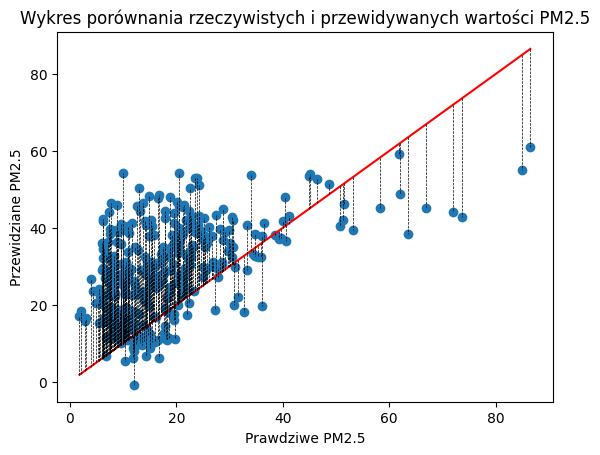

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,10.46,19.524521,-9.064521
1,10.38,22.717041,-12.337041
2,10.29,23.830360,-13.540360
3,6.89,28.813430,-21.923430
4,7.56,27.988577,-20.428577
...,...,...,...
344,9.90,17.485257,-7.585257
345,8.40,14.206340,-5.806340
346,10.20,13.392989,-3.192989
347,8.40,16.722459,-8.322459


In [4]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

params =  {'alpha': 13540.755556026974}
model = Ridge(**params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results

